# Exercício 1

Criar um código que abra uma imagem e crie histogramas para cada um dos canais de cor (RGB).

### Resolução:
O código da célula a seguir abre uma janela para que seja selecionada uma imagem do computador. A imagem selecionada será salva na seção e será utilizada na célula seguinte.

In [ ]:
from google.colab import files

print("Por favor, selecione uma imagem no formato JPG: ")
arquivo_carregado = files.upload()

nome_do_arquivo = list(arquivo_carregado.keys())[0]

print(f'Imagem carregada: {nome_do_arquivo}')

Por favor, selecione uma imagem no formato JPG: 


Saving imagem.jpg to imagem (4).jpg
Imagem carregada: imagem (4).jpg


O trecho a seguir abre a imagem selecionada na célula anterior, separa seus canais vermelho, verde e azul e plota um histograma para cada canal (a imagem é mostrada junto aos histogramas).

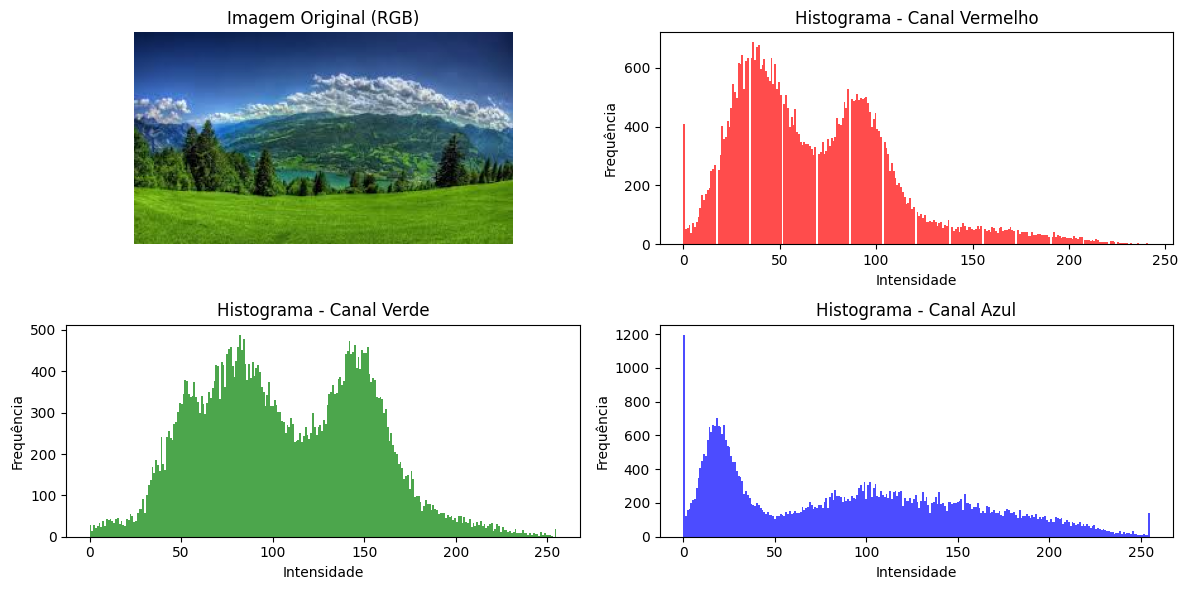

In [ ]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread(nome_do_arquivo)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(imagem_rgb)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(imagem_rgb)
plt.title("Imagem Original (RGB)")
plt.axis("off")

# Histograma do canal vermelho
plt.subplot(2, 2, 2)
plt.hist(r.ravel(), bins=256, color='red', alpha=0.7)
plt.title("Histograma - Canal Vermelho")
plt.xlabel("Intensidade")
plt.ylabel("Frequência")

# Histograma do canal verde
plt.subplot(2, 2, 3)
plt.hist(g.ravel(), bins=256, color='green', alpha=0.7)
plt.title("Histograma - Canal Verde")
plt.xlabel("Intensidade")
plt.ylabel("Frequência")

# Histograma do canal azul
plt.subplot(2, 2, 4)
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Histograma - Canal Azul")
plt.xlabel("Intensidade")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

# Exercício 2
Crie um código que abre a câmera do computador, tire uma foto dos integrantes do grupo, escreve o nome dos integrantes do grupo na imagem e salva a imagem com o texto escrito sobre ela.

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
from datetime import datetime
import io, cv2, numpy as np

def capturar_foto(caminho='foto.png'):
    js_code = Javascript('''
    async function capturePhoto() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const canvas = document.createElement('canvas');
      const button = document.createElement('button');
      button.textContent = '📸 Tirar Foto';
      button.style.fontSize = '16px';
      button.style.marginTop = '8px';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({ video: true });
      video.srcObject = stream;
      await video.play();

      await new Promise(resolve => button.onclick = resolve);

      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(t => t.stop());
      div.remove();

      return canvas.toDataURL('image/png');
    }
    ''')
    display(js_code)
    data = eval_js('capturePhoto()')
    binary = b64decode(data.split(',')[1])
    with open(caminho, 'wb') as f:
        f.write(binary)
    return caminho

<IPython.core.display.Javascript object>

Foto salva em: foto.png
Imagem final salva em: foto_com_nomes.png


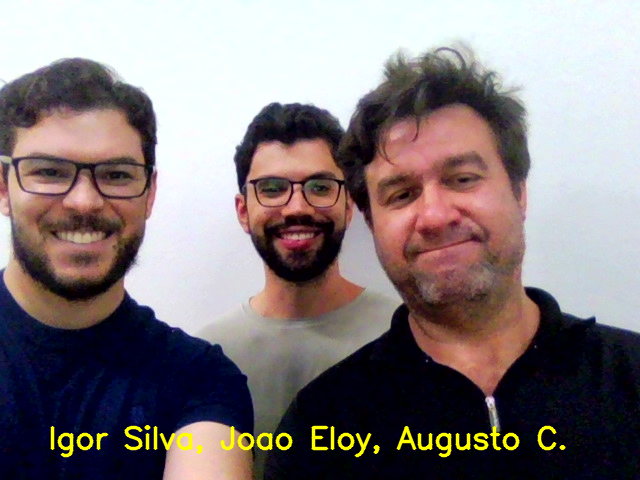

In [3]:
caminho_foto = capturar_foto()
print("Foto salva em:", caminho_foto)

img = cv2.imread(caminho_foto)

integrantes = "Igor Silva, Joao Eloy, Augusto C."
fonte = cv2.FONT_HERSHEY_SIMPLEX
escala = 1.0
espessura = 2

# Calcula posição do texto
tamanho, _ = cv2.getTextSize(integrantes, fonte, escala, espessura)
x = int(img.shape[0]*0.1)
y = int(img.shape[1]*0.7)

# Cor do Texto: Preto
cor_texto = (0,255,255)
cv2.putText(img, integrantes, (x, y), fonte, escala, cor_texto, espessura, cv2.LINE_AA)

saida = 'foto_com_nomes.png'
cv2.imwrite(saida, img)
print("Imagem final salva em:", saida)

from IPython.display import Image as ShowImage, display as show
show(ShowImage(filename=saida))